In [25]:
import pandas as pd
import numpy as np
import datetime as dt
import re

In [27]:
race_df = pd.read_csv("../scraping/fis_scrape/worldloppet_races.csv")

#how many racers
print(len(race_df))

#define index for get function
#print(race_df.race_description.str.split()[1])

new_race_df = race_df.copy()
new_race_df.head(5)

#break down formatting one at a time to troubleshoot any new errors

614292


,race_description,race_name,racer_nationality,racer_time
0,12.08.2017 48 km CT,Ushuaia Loppet Main,ARG,02:16:34
1,12.08.2017 48 km CT,Ushuaia Loppet Main,ARG,02:35:10
2,12.08.2017 48 km CT,Ushuaia Loppet Main,POL,02:48:40
3,12.08.2017 48 km CT,Ushuaia Loppet Main,ARG,02:49:54
4,12.08.2017 48 km CT,Ushuaia Loppet Main,ARG,02:51:14


In [28]:
#race date NB *very* long step
new_race_df['date'] = pd.to_datetime(race_df.race_description.str.split().str.get(0).str.replace(".", "-"))

In [30]:
new_race_df['year'] = new_race_df.date.dt.year

In [31]:
new_race_df['month'] = new_race_df.date.dt.month

In [32]:
new_race_df['week'] = new_race_df.date.dt.weekofyear

In [33]:
print(race_df.race_name.unique())

# first, setup a host country tag (good for the compare to racer_nationality rationale)
# so, idea being that if I can breakdown by host country... should be able to get most popular races(by country)

# then, define the splitting distance for short/long races. (optional, really)
# will have to condense the list of 173 unique race_names (fortunately plenty of redundancy
# should have to setup 20 ifelses like (if contains china == CHN or america == USA)

['Ushuaia Loppet Main' 'Kangaroo Hoppet Main' 'Merino Muster Main'
 'Vasaloppet China Main' 'Dolomitenlauf CL' 'Dolomitenlauf Main'
 'Marcialonga Main' 'König Ludwig Lauf FT' 'König Ludwig Lauf Main'
 'Sapporo Int. Ski Marathon Main' 'La Transjurassienne Classic'
 'La Transjurassienne Marathon' 'La Transjurassienne Main'
 'Tartu Maraton Open Track' 'Gatineau Loppet CL' 'Jizerská Padesatka Main'
 'Gatineau Loppet Main' 'Tartu Maraton Main' 'Finlandia-hiihto Main'
 'American Birkebeiner Birkie FT' 'American Birkebeiner Birkie CL'
 'Finlandia-hiihto 100' 'Finlandia-hiihto ' 'Vasaloppet Oppet Spar Sun'
 'Vasaloppet Oppet Spar Mon' 'Bieg Piastow Main'
 'Demino Ski Marathon Main' 'Vasaloppet Main' 'Engadin Skimarathon Main'
 'Birkebeinerrennet FredagsBirken CT/FT' 'Birkebeinerrennet Main'
 'Ushuaia Loppet Promo' 'Ushuaia Loppet Marchablanca'
 'Kangaroo Hoppet Australian Birkebeiner' 'Merino Muster Snow Rake'
 'Vasaloppet China Short' 'Dolomitenlauf Short CL'
 'Dolomitenlauf Lienz Lauf' 'Marc

In [34]:
# setup a function which generates a 'host country' based on 'race_name' string

def host_country_gen(r):
    if 'Ushuaia' in r:
        return "ARG"
    elif 'American' in r:
            return "USA"
    elif 'Kangaroo' in r:
            return "AUS"
    elif 'Bieg' in r:
            return "POL"
    elif 'Transjurassienne' in r:
            return "FRA"
    elif 'Dolomitenlauf' in r:
            return "AUT"
    elif 'Marcialonga' in r:
            return "ITA"
    elif 'Engadin' in r:
            return "SUI"
    elif 'Padesatka' in r:
            return "CZE"
    elif 'Ludwig' in r:
            return "GER"
    elif 'Tartu' in r:
            return "EST"
    elif 'Finland' in r:
            return "FIN"
    elif 'China' in r:
            return "CHN"
    elif 'Sapporo' in r:
            return "JPN"
    elif 'Gatineau' in r:
            return "CAN"
    elif 'Birkebeinerrennet' in r:
            return "NOR"
    elif 'Fossavatnsgangan' in r:
            return "ISL"
    elif 'Merino' in r:
            return "NZL"
    elif 'Demino' in r:
            return "RUS"
    elif 'Vasaloppet' in r:
            return "SWE"
    else:
        return "none"

In [35]:
new_race_df['host_country'] = race_df.race_name.apply(host_country_gen)
print(new_race_df.host_country.unique())
len(new_race_df.host_country.unique())
# all countries accounted for !!  
# confirm no misattributes but with vasaloppet last should be OK

['ARG' 'AUS' 'NZL' 'CHN' 'AUT' 'ITA' 'GER' 'JPN' 'FRA' 'EST' 'CAN' 'CZE'
 'FIN' 'USA' 'SWE' 'POL' 'RUS' 'SUI' 'NOR' 'ISL']


20

In [43]:
# setup quick numerical boolean to query tourist %'s
# 0 = racer is native; 1 = racer is a visitor (tourist)
new_race_df['tourist'] = np.where(new_race_df.racer_nationality != new_race_df.host_country, 1, 0)
#fastcheck
new_race_df.groupby('host_country').mean()['tourist'].sort_values(ascending = False)

host_country
AUT    0.800848
NZL    0.671164
ITA    0.661302
ISL    0.596610
GER    0.569041
CHN    0.495010
ARG    0.329457
SUI    0.286586
CAN    0.247219
POL    0.245444
FIN    0.237778
CZE    0.223501
AUS    0.211349
FRA    0.209550
EST    0.176132
SWE    0.119791
NOR    0.114620
RUS    0.086763
JPN    0.075348
USA    0.029520
Name: tourist, dtype: float64

In [44]:
#race distance
new_race_df['distance'] = pd.to_numeric(race_df.race_description.str.split().str.get(1).str.replace(',', '.'))

In [47]:
#race style
new_race_df['style'] = race_df.race_description.str.split().str.get(3)
new_race_df['style'].unique()

array(['CT', 'FT'], dtype=object)

In [48]:
#racer nationality
new_race_df['racer_nationality'] = new_race_df['racer_nationality'].str.upper()

In [49]:
#racer time 
new_race_df['racer_time'] = pd.to_timedelta(new_race_df.racer_time.str.extract('(\d+[:|.]\d{2}[:|.]\d{2})').str.replace(".", ":"))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [50]:
new_race_df['racer_pace'] = new_race_df['distance'] / (new_race_df['racer_time'] / dt.timedelta(hours=1))

In [51]:
### after evaluating racer_pace, I came to the realization that there are some "DNF" finish times
### therefore, I will split the df into two: race_finishers and race_dnf using null/notnull arguments

race_finishers = new_race_df[pd.notnull(new_race_df.racer_pace)].copy()
#note, I should also filter out the American Birkie main from last year (bike pace)

race_dnf = new_race_df[pd.isnull(new_race_df.racer_pace)].copy()

In [52]:
race_finishers.head(2)

,race_description,race_name,racer_nationality,racer_time,date,year,month,week,host_country,tourist,distance,style,racer_pace
0,12.08.2017 48 km CT,Ushuaia Loppet Main,ARG,02:16:34,2017-12-08,2017,12,49,ARG,0,48.0,CT,21.088601
1,12.08.2017 48 km CT,Ushuaia Loppet Main,ARG,02:35:10,2017-12-08,2017,12,49,ARG,0,48.0,CT,18.560687


In [53]:
race_finishers.groupby(['host_country', "year"])['style'].count()

host_country  year
ARG           2014       92
              2015      201
              2016       55
              2017      168
AUS           2012      639
              2013      498
              2014      576
              2015      575
              2016      586
              2017      563
AUT           2013     1244
              2014     1688
              2015      988
              2016     1032
              2017      843
              2018     1039
CAN           2013     1019
              2014     1231
              2015     1031
              2016     1087
              2017     1192
              2018     1272
CHN           2015      323
              2016      295
              2017      415
              2018      470
CZE           2013     5319
              2015     5226
              2016     3400
              2017     5167
                      ...  
NZL           2017      148
POL           2013     3575
              2014     1488
              2015     3072
 

In [54]:
### this is some Python EDA
### develop ideas for R / R shiny implementation

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

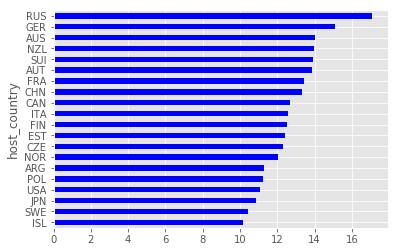

In [56]:
race_finishers.groupby('host_country')['racer_pace'].median().sort_values().plot(kind = 'barh', color='b')
plt.xlabel('race pace (km/h)')
plt.ylabel('Host Country')
plt.title('Median race pace by host country', fontsize=20)
# consider a split for long/short races? some division by distance

Text(0.5,1,'Race pace distribution')

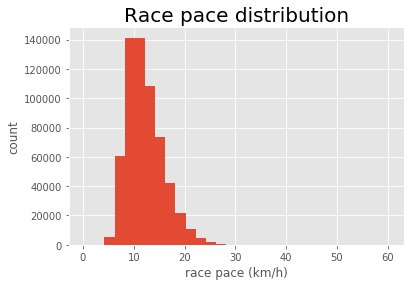

In [57]:
#dist of racer_pace 
plt.hist(race_finishers.racer_pace, bins = 30)
plt.xlabel('race pace (km/h)')
plt.ylabel('count')
plt.title('Race pace distribution', fontsize=20)

(array([ 3.,  4., 27., 29., 21.,  0., 10., 17., 21., 16.,  6.,  1.,  2.,
         0.,  1.,  0.,  0., 12.,  0.,  2.]),
 array([ 10. ,  14.5,  19. ,  23.5,  28. ,  32.5,  37. ,  41.5,  46. ,
         50.5,  55. ,  59.5,  64. ,  68.5,  73. ,  77.5,  82. ,  86.5,
         91. ,  95.5, 100. ]),
 <a list of 20 Patch objects>)

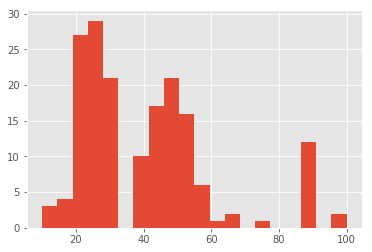

In [65]:
plt.hist(race_finishers.groupby('race_name')['distance'].mean(), bins = 20)
#this is a rough pass on the distance metric but looks like I need to apply normalization (box-cox?)

(array([270.,  16.,   6.,   9.,   4.,   3.,   0.,   0.,   1.,   5.]),
 array([1.00000e+01, 2.80280e+03, 5.59560e+03, 8.38840e+03, 1.11812e+04,
        1.39740e+04, 1.67668e+04, 1.95596e+04, 2.23524e+04, 2.51452e+04,
        2.79380e+04]),
 <a list of 10 Patch objects>)

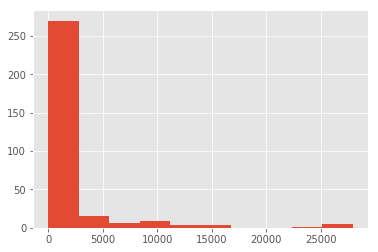

In [66]:
plt.hist(race_finishers.groupby(['host_country', 'year', 'distance', 'style'])['month'].count())
#highly skewed ... box-cox transformation required